<a href="https://colab.research.google.com/github/khalidakram07/Real-Estate/blob/khalid/14__of_realestate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#2
!pip install -U -q PyDrive
import pandas as pd

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id': "1jnd9kqvJaIuAIP0S1biVHrGMq_mK3GzO"}) 
downloaded.GetContentFile('apartments_for_rent_classified_10K.xlsx')  
#df = pd.read_csv('apartments_for_rent_classified_10K.xlsx')

# **Data collection and cleaning**

In [ ]:
#3
from pandas import read_excel
my_sheet = 'apartments_for_rent_classif (2)' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
file_name = 'apartments_for_rent_classified_10K.xlsx' # change it to the name of your excel file
df = read_excel(file_name, sheet_name = my_sheet)
df.head() # shows headers with top 5 rows

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,None,790,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,None,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,None,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,None,880,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


# **STEP 2: Finding missing data**


In [ ]:
#4
df.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     1748
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

Using isnull().sum on dataframe object df we find all missing values. We have Amenities=3549,Bathrooms=33,Bedrooms, Pet_allowed=1745, address=3325, cityname=77, state=77, latitute=10,longitude=10.


In [ ]:
#5
#Total no of rows missing
sum(df.isnull().any(axis=1))

6457

In [ ]:
#6
#checking missing values in column amenities
# creating bool series True for NaN values 
bool_series = pd.isnull(df["amenities"]) 
	
# filtering data 
# displaying data only with amenities = NaN 
df[bool_series] 


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,None,790,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,None,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,None,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,None,880,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,5659917503,housing/rent/apartment,Four BR 17595 Burl Oak Court,"This unit is located at 17595 Burl Oak Court, ...",NaN,5.0,4.0,USD,No,Thumbnail,None,4500,"$4,500",Monthly,5407,17595 Burl Oak CT,Eden Prairie,MN,44.8653,-93.4749,RentLingo,1576667692
9994,5664597657,housing/rent/apartment,Six BR 2536 W Canyon Ridge Rd.,This unit is located at 2536 W Canyon Ridge Rd...,NaN,4.0,6.0,USD,No,Thumbnail,None,3000,"$3,000",Monthly,5921,2536 W Canyon Ridge Road,Saint George,UT,37.0835,-113.5823,RentLingo,1577017103
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,None,6000,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,None,25000,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419


In [ ]:
#7
#checking missing values in column cityname           
# creating bool series True for NaN values 
nan_city_name = pd.isnull(df["cityname"]) 
	
# filtering data 
# displaying data only with Gender = NaN 
df[nan_city_name] 


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
22,5664567303,housing/rent/apartment,One BR Leeward Ct,"This unit is located at Leeward Ct, Fleming Is...",NaN,1.0,1.0,USD,No,Thumbnail,None,525,$525,Monthly,200,NaN,NaN,NaN,NaN,NaN,RentLingo,1577014825
31,5668619369,housing/rent/apartment,One BR Mullica Way,"This unit is located at Mullica Way, Devonshir...",Pool,1.0,1.0,USD,No,Thumbnail,None,750,$750,Monthly,219,NaN,NaN,NaN,NaN,NaN,RentLingo,1577358921
37,5664573404,housing/rent/apartment,One BR New Providence Dr Apartment 90,This unit is located at New Providence Dr Apar...,NaN,1.0,1.0,USD,No,Thumbnail,None,750,$750,Monthly,220,NaN,NaN,NaN,NaN,NaN,RentLingo,1577015212
76,5664574093,housing/rent/apartment,One BR 8th Avenue North,"This unit is located at eighth Avenue North, O...",NaN,1.0,1.0,USD,No,Thumbnail,None,1025,"$1,025",Monthly,250,8th Ave North,NaN,NaN,39.8163,-98.5576,RentLingo,1577015259
161,5668622658,housing/rent/apartment,One BR Hinson Ave,"This unit is located at Hinson Ave, Haines, 33...",Pool,1.0,1.0,USD,No,Thumbnail,None,625,$625,Monthly,250,NaN,NaN,NaN,NaN,NaN,RentLingo,1577359130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,5664596769,housing/rent/apartment,"Two BR 1833 Lombard St, Unit B","This unit is located at 1833 Lombard St, Unit ...",NaN,1.0,2.0,USD,No,Thumbnail,None,2095,"$2,095",Monthly,1650,1833 Lombard St Unit B,NaN,NaN,39.8163,-98.5576,RentLingo,1577017017
9259,5664597711,housing/rent/apartment,Two BR Lakeside Blvd,"This unit is located at Lakeside Blvd, Shelby ...",NaN,2.0,2.0,USD,No,Thumbnail,"Cats,Dogs",1650,"$1,650",Monthly,1665,NaN,NaN,NaN,NaN,NaN,RentLingo,1577017108
9542,5668624794,housing/rent/apartment,Five BR 22 Austin Street,"This unit is located at 22 Austin Street, Char...","Dishwasher,Parking,Patio/Deck,Refrigerator",2.0,5.0,USD,No,Thumbnail,None,4500,"$4,500",Monthly,1950,22 Austin St,NaN,NaN,39.8163,-98.5576,RentLingo,1577359268
9561,5668633890,housing/rent/apartment,Three BR 229 Delmont St #259,"This unit is located at 229 Delmont St #259, C...",NaN,2.0,3.0,USD,No,Thumbnail,"Cats,Dogs",1985,"$1,985",Monthly,1975,229 Delmont St #259,NaN,NaN,39.8163,-98.5576,RentLingo,1577359942


In [ ]:
#(8)
df['time'] = pd.to_datetime(df['time'], unit='s')
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,None,790,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,2019-12-26 11:23:35
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,None,425,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,2019-12-22 12:17:43
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,2019-12-26 11:23:30
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,None,925,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,2019-12-18 11:15:43
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,None,880,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,2019-12-26 11:23:21


In [ ]:
#9
# Checking out the total unique categories in the dataset
np.unique(df['category'])

# Found that there are 3 unique categories ['housing/rent/apartment', 'housing/rent/home', 'housing/rent/short_term']

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term'], dtype=object)

In [ ]:
#10
# checking that what are the occurences of each unique categories in the dataset
df['category'].value_counts()
df.drop(index=df[df['category'] == 'housing/rent/short_term'].index, inplace=True)
df.drop(index=df[df['category'] == 'housing/rent/home'].index, inplace=True)
df['category'].value_counts()
del df['category']
print(df.head())

           id  ...                time
0  5668626895  ... 2019-12-26 11:23:35
1  5664597177  ... 2019-12-22 12:17:43
2  5668626833  ... 2019-12-26 11:23:30
3  5659918074  ... 2019-12-18 11:15:43
4  5668626759  ... 2019-12-26 11:23:21

[5 rows x 21 columns]


In [ ]:
#11
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude
count,9.996000e+03,9963.000000,9989.000000,9996.000000,9996.000000,9986.000000,9986.000000
mean,5.623385e+09,1.381612,1.744018,1486.634654,945.864646,37.696554,-94.653289
std,7.022179e+07,0.611336,0.942503,1076.572608,655.878961,5.496069,15.761776
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.688675,-101.301700
50%,5.668610e+09,1.000000,2.000000,1270.500000,802.000000,38.809800,-93.651600
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.194625
max,5.668663e+09,8.000000,9.000000,52500.000000,40000.000000,61.594000,-70.191600


In [ ]:
#12
df.shape

(9996, 21)

In [ ]:
#13
df.tail(5)

,id,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
9995,5630240092,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,None,6000,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,2019-11-30 11:22:55
9996,5668640983,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,None,25000,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,2019-12-26 11:40:19
9997,5668643292,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.0,6.0,USD,No,Thumbnail,None,11000,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,2019-12-26 11:42:40
9998,5668662559,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,NaN,4790,"$4,790",Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,2019-12-26 12:09:46
9999,5509132540,Beautiful Lawrenceville Apartment for rent,"Square footage: 880 sq. feet, unit number: 150...","Gym,Patio/Deck",1.0,1.0,USD,No,No,NaN,1009,"$1,009",Monthly,880,NaN,Lawrenceville,GA,34.0072,-84.0034,RentDigs.com,2019-12-26 12:09:01


In [ ]:
#14
np.unique(df['currency'])

array(['USD'], dtype=object)

**#Step3 : Visualize dataset for distribution by Constructing histograms, box plots, and scatter plots**


In [ ]:
#15
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [ ]:
#16
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

**after knowing out dataset including complete visualization we can start by dropping unncesary columns like time...**

In [ ]:
'''
#20
del df['time']
df.head(5)
'''

"\n#20\ndel df['time']\ndf.head(5)\n"

Dropping address column as the same is avaiblbe in title 

In [ ]:
#17
del df['address']
del df['amenities']
df.head(5)

,id,title,body,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time
0,5668626895,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,0.0,USD,No,Thumbnail,None,790,$790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo,2019-12-26 11:23:35
1,5664597177,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,1.0,USD,No,Thumbnail,None,425,$425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo,2019-12-22 12:17:43
2,5668626833,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",1.0,0.0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo,2019-12-26 11:23:30
3,5659918074,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",1.0,0.0,USD,No,Thumbnail,None,925,$925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo,2019-12-18 11:15:43
4,5668626759,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,0.0,USD,No,Thumbnail,None,880,$880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo,2019-12-26 11:23:21


Merging Title+cityname+state+latititute+longitude = Full_address

In [ ]:
#18
df["Full_address"] = df["title"] + df["cityname"]

In [ ]:
#19
df.head()

,id,title,body,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,state,latitude,longitude,source,time,Full_address
0,5668626895,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,0.0,USD,No,Thumbnail,None,790,$790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo,2019-12-26 11:23:35,"Studio apartment 2nd St NE, Uhland Terrace NE,..."
1,5664597177,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,1.0,USD,No,Thumbnail,None,425,$425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo,2019-12-22 12:17:43,Studio apartment 814 Schutte RoadEvansville
2,5668626833,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",1.0,0.0,USD,No,Thumbnail,None,1390,"$1,390",Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo,2019-12-26 11:23:30,"Studio apartment N Scott St, 14th St N, Arling..."
3,5659918074,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",1.0,0.0,USD,No,Thumbnail,None,925,$925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo,2019-12-18 11:15:43,Studio apartment 1717 12th AveSeattle
4,5668626759,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,0.0,USD,No,Thumbnail,None,880,$880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo,2019-12-26 11:23:21,"Studio apartment Washington Blvd, N Cleveland ..."


In [ ]:
#20
del df["title"] 


del df["body"]


deleting price display as it seem to be redundant

In [ ]:
#21
del df["price_display"]

In [ ]:
#22
df.head()

,id,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,cityname,state,latitude,longitude,source,time,Full_address
0,5668626895,NaN,0.0,USD,No,Thumbnail,None,790,Monthly,101,Washington,DC,38.9057,-76.9861,RentLingo,2019-12-26 11:23:35,"Studio apartment 2nd St NE, Uhland Terrace NE,..."
1,5664597177,NaN,1.0,USD,No,Thumbnail,None,425,Monthly,106,Evansville,IN,37.9680,-87.6621,RentLingo,2019-12-22 12:17:43,Studio apartment 814 Schutte RoadEvansville
2,5668626833,1.0,0.0,USD,No,Thumbnail,None,1390,Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo,2019-12-26 11:23:30,"Studio apartment N Scott St, 14th St N, Arling..."
3,5659918074,1.0,0.0,USD,No,Thumbnail,None,925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo,2019-12-18 11:15:43,Studio apartment 1717 12th AveSeattle
4,5668626759,NaN,0.0,USD,No,Thumbnail,None,880,Monthly,125,Arlington,VA,38.8738,-77.1055,RentLingo,2019-12-26 11:23:21,"Studio apartment Washington Blvd, N Cleveland ..."


Converting latitute + longitute with column name GPS(KHALID)


In [ ]:
#23-khalid
df
df.isnull().sum()

id                 0
bathrooms         33
bedrooms           7
currency           0
fee                0
has_photo          0
pets_allowed    1745
price              0
price_type         0
square_feet        0
cityname          77
state             77
latitude          10
longitude         10
source             0
time               0
Full_address      77
dtype: int64

removing latitude and longitude

In [ ]:
#24-khalid
df=df.dropna(subset=['latitude'])
df.isnull().sum()

id                 0
bathrooms         33
bedrooms           7
currency           0
fee                0
has_photo          0
pets_allowed    1745
price              0
price_type         0
square_feet        0
cityname          67
state             67
latitude           0
longitude          0
source             0
time               0
Full_address      67
dtype: int64

In [ ]:
#25-khalid
df=df.dropna(subset=['state'])
df.isnull().sum()

id                 0
bathrooms         33
bedrooms           7
currency           0
fee                0
has_photo          0
pets_allowed    1744
price              0
price_type         0
square_feet        0
cityname           0
state              0
latitude           0
longitude          0
source             0
time               0
Full_address       0
dtype: int64

In [ ]:
#26
!pip install geopandas

     |████████████████████████████████| 1.0MB 8.6MB/s 
     |████████████████████████████████| 15.3MB 188kB/s 
     |████████████████████████████████| 6.5MB 35.1MB/s 


In [ ]:
#32
print(df[df['state'].isnull()])

Empty DataFrame
Columns: [id, bathrooms, bedrooms, currency, fee, has_photo, pets_allowed, price, price_type, square_feet, cityname, state, latitude, longitude, source, time, Full_address]
Index: []


Converting pets to zero if no pets are allowed and 1 if pets are allowed

In [ ]:
#33
df.pets_allowed.unique()

array(['None', nan, 'Cats,Dogs', 'Cats', 'Dogs'], dtype=object)

Pets_allowed contains 4 categories
1.none
2.nan
3.cats
4.dogs

lets first delete nan

In [ ]:
#34 deleting rows containing nan as we have large dataset.
df=df.dropna(subset=['pets_allowed'])

In [ ]:
df.pets_allowed.unique()

array(['None', 'Cats,Dogs', 'Cats', 'Dogs'], dtype=object)

In [ ]:
#35 df["bathrooms"].mean()

dropping nan values of bathroom as it has only 33 rows

In [ ]:
#36
df=df.dropna(subset=['bathrooms'])


dropping nan values of bedrooms as it has only 4 rows

In [ ]:
#37
df=df.dropna(subset=['bedrooms'])

checking shape of the dataframe to see how to deal with missing values in address.

In [ ]:
#38
df.shape

(8139, 17)

since we have 8139 rows in dataframe and 1674 missing non numerical rows of address we can delete these rows aswell

In [ ]:
#39
df.isnull().sum()
df.head()

,id,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,cityname,state,latitude,longitude,source,time,Full_address
2,5668626833,1.0,0.0,USD,No,Thumbnail,None,1390,Monthly,107,Arlington,VA,38.8910,-77.0816,RentLingo,2019-12-26 11:23:30,"Studio apartment N Scott St, 14th St N, Arling..."
3,5659918074,1.0,0.0,USD,No,Thumbnail,None,925,Monthly,116,Seattle,WA,47.6160,-122.3275,RentLingo,2019-12-18 11:15:43,Studio apartment 1717 12th AveSeattle
8,5668610290,1.0,0.0,USD,No,Thumbnail,None,1495,Monthly,138,San Francisco,CA,37.7599,-122.4379,RentLingo,2019-12-26 11:05:13,Studio apartment 333 Hyde StSan Francisco
14,5664571820,1.0,0.0,USD,No,Thumbnail,None,1695,Monthly,190,San Francisco,CA,37.7599,-122.4379,RentLingo,2019-12-22 11:45:21,Studio apartment 57 Taylor StreetSan Francisco
15,5659276240,1.0,1.0,USD,No,Thumbnail,"Cats,Dogs",1560,Weekly,200,New Bern,NC,35.0847,-77.0609,ListedBuy,2019-12-17 21:27:56,Studio Cottage 214New Bern


with missing values dealt with,now lets focus on other attributes like fee,id,fee and source

lets calculate correlation and find whichcolumns are important

In [ ]:
#40
df.corr()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude
id,1.000000,-0.043596,0.021139,-0.007706,0.005031,-0.034496,-0.182787
bathrooms,-0.043596,1.000000,0.702624,0.493978,0.793039,-0.047703,0.003472
bedrooms,0.021139,0.702624,1.000000,0.378530,0.745694,0.030900,0.040831
price,-0.007706,0.493978,0.378530,1.000000,0.542708,0.004482,-0.222817
square_feet,0.005031,0.793039,0.745694,0.542708,1.000000,-0.015438,0.014884
latitude,-0.034496,-0.047703,0.030900,0.004482,-0.015438,1.000000,-0.118533
longitude,-0.182787,0.003472,0.040831,-0.222817,0.014884,-0.118533,1.000000


In [ ]:
#41
df.isnull().sum()

id              0
bathrooms       0
bedrooms        0
currency        0
fee             0
has_photo       0
pets_allowed    0
price           0
price_type      0
square_feet     0
cityname        0
state           0
latitude        0
longitude       0
source          0
time            0
Full_address    0
dtype: int64

# feature extraction:
dropping price  

In [ ]:
#42
del df["price_type"]



Dropping Ids

In [ ]:

#43
del df["id"]


checking unique values for column source

In [ ]:
#44
np.unique(df['source'])

array(['GoSection8', 'Listanza', 'ListedBuy', 'RENTCafé', 'RENTOCULAR',
       'RealRentals', 'RentDigs.com', 'RentLingo', 'rentbits',
       'tenantcloud'], dtype=object)

In [ ]:
#45
np.unique(df['cityname'])

array(['Aberdeen', 'Abilene', 'Abington', ..., 'Ypsilanti', 'Yuba City',
       'Yukon'], dtype=object)

In [ ]:

#46
np.unique(df['state'])

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [ ]:
#47
np.unique(df['fee'])


array(['No'], dtype=object)

In [ ]:
#48
np.unique(df['currency'])

array(['USD'], dtype=object)

In [ ]:
#49
np.unique(df['has_photo'])


array(['No', 'Thumbnail', 'Yes'], dtype=object)

since fee is no for all columns and currency is usd for all columns we will delete it

In [ ]:
#50
del df["currency"]
del df["fee"]
del df["has_photo"]
df

,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time,Full_address
2,1.0,0.0,None,1390,107,Arlington,VA,38.8910,-77.0816,RentLingo,2019-12-26 11:23:30,"Studio apartment N Scott St, 14th St N, Arling..."
3,1.0,0.0,None,925,116,Seattle,WA,47.6160,-122.3275,RentLingo,2019-12-18 11:15:43,Studio apartment 1717 12th AveSeattle
8,1.0,0.0,None,1495,138,San Francisco,CA,37.7599,-122.4379,RentLingo,2019-12-26 11:05:13,Studio apartment 333 Hyde StSan Francisco
14,1.0,0.0,None,1695,190,San Francisco,CA,37.7599,-122.4379,RentLingo,2019-12-22 11:45:21,Studio apartment 57 Taylor StreetSan Francisco
15,1.0,1.0,"Cats,Dogs",1560,200,New Bern,NC,35.0847,-77.0609,ListedBuy,2019-12-17 21:27:56,Studio Cottage 214New Bern
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,5.0,5.0,"Cats,Dogs",6900,5700,Lutz,FL,28.1253,-82.4468,RentLingo,2019-12-26 11:24:02,Five BR 18605 Avenue MonacoLutz
9994,4.0,6.0,None,3000,5921,Saint George,UT,37.0835,-113.5823,RentLingo,2019-12-22 12:18:23,Six BR 2536 W Canyon Ridge Rd.Saint George
9995,4.0,5.0,None,6000,6300,Edina,MN,44.9000,-93.3233,RentLingo,2019-11-30 11:22:55,Five BR 5407 Abbott Place - AbbottEdina
9996,8.0,6.0,None,25000,8716,Montecito,CA,34.4331,-119.6331,RentLingo,2019-12-26 11:40:19,Six BR 256 Las EntradasMontecito


In [ ]:
df.loc[df['bathrooms'] == 8.0].sum()

bathrooms                                                      16
bedrooms                                                       12
pets_allowed                                             NoneNone
price                                                       36000
square_feet                                                 20034
cityname                                         MontecitoPotomac
state                                                        CAMD
latitude                                                  73.4618
longitude                                                -196.874
source                                         RentLingoRentLingo
Full_address    Six BR 256 Las EntradasMontecitoSix BR 9908 Be...
dtype: object


dropping latitude and longitude as its merged for column called geometry

In [ ]:
'''#51
del df["latitude"]
del df["longitude"]
df'''

'#51\ndel df["latitude"]\ndel df["longitude"]\ndf'

In [ ]:
#52
df1=df[['bathrooms','bedrooms','price','square_feet']]
df1

,bathrooms,bedrooms,price,square_feet
2,1.0,0.0,1390,107
3,1.0,0.0,925,116
8,1.0,0.0,1495,138
14,1.0,0.0,1695,190
15,1.0,1.0,1560,200
...,...,...,...,...
9993,5.0,5.0,6900,5700
9994,4.0,6.0,3000,5921
9995,4.0,5.0,6000,6300
9996,8.0,6.0,25000,8716


outlier detection 

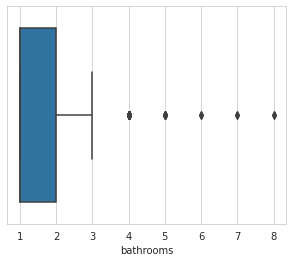

In [ ]:
#53
import seaborn as sns
sns.boxplot(x=df['bathrooms'])



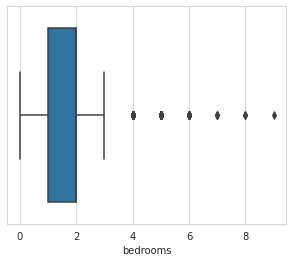

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      #54
sns.boxplot(x=df['bedrooms'])


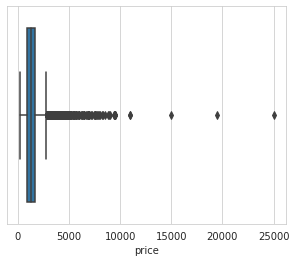

In [ ]:
#55
sns.boxplot(x=df['price'])

In [ ]:
#60
#x['bedrooms'].max()

df['bedrooms'].value_counts()

1.0    3858
2.0    2509
3.0    1107
4.0     385
0.0     175
5.0      84
6.0      15
7.0       3
8.0       2
9.0       1
Name: bedrooms, dtype: int64

From the above results it can be observed that bedrooms=6,7,8 has only two rows and its an outlier so we will delete these rows

In [ ]:
df_bed = df[ df['bedrooms'] > 6 ] # Step 1
df = df.drop(df_bed.index, axis=0) # Step 2

In [ ]:
df['bathrooms'].value_counts()

1.0    5586
2.0    2249
3.0     170
4.0     117
5.0       7
8.0       2
6.0       2
Name: bathrooms, dtype: int64

It can be seen from the above results that theres only 2 rows for 6 and 8 bathrooms each. So we can delete them to avoid outliers.

In [ ]:
df_bed = df[ df['bathrooms'] > 5 ] # Step 1
df = df.drop(df_bed.index, axis=0) # Step 2
df['bathrooms'].value_counts()

1.0    5586
2.0    2249
3.0     170
4.0     117
5.0       7
Name: bathrooms, dtype: int64

In [ ]:
df['square_feet'].value_counts()

700     151
600     135
250     129
800     128
900     122
       ... 
190       1
2215      1
2207      1
2187      1
2065      1
Name: square_feet, Length: 1662, dtype: int64

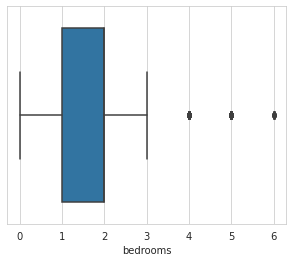

In [ ]:
#61
sns.boxplot(x=df['bedrooms'])

In [ ]:
df.head()

,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time,Full_address
2,1.0,0.0,None,1390,107,Arlington,VA,38.8910,-77.0816,RentLingo,2019-12-26 11:23:30,"Studio apartment N Scott St, 14th St N, Arling..."
3,1.0,0.0,None,925,116,Seattle,WA,47.6160,-122.3275,RentLingo,2019-12-18 11:15:43,Studio apartment 1717 12th AveSeattle
8,1.0,0.0,None,1495,138,San Francisco,CA,37.7599,-122.4379,RentLingo,2019-12-26 11:05:13,Studio apartment 333 Hyde StSan Francisco
14,1.0,0.0,None,1695,190,San Francisco,CA,37.7599,-122.4379,RentLingo,2019-12-22 11:45:21,Studio apartment 57 Taylor StreetSan Francisco
15,1.0,1.0,"Cats,Dogs",1560,200,New Bern,NC,35.0847,-77.0609,ListedBuy,2019-12-17 21:27:56,Studio Cottage 214New Bern


using visualization to see the relation between the variables

In [ ]:
#62
df.columns = ['bathrooms'	,'bedrooms',	'pets_allowed','price','square_feet'	,	'cityname'	,'state'	,'latitude','longitude','source','time','Full_address']
df.index = df.price
bedrooms = df['bedrooms']





[]

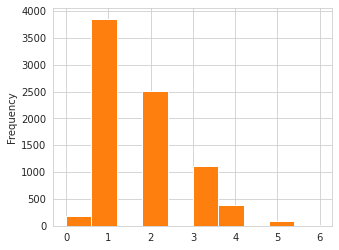

In [ ]:
#63
bedrooms.plot(kind='hist')
#17
plt.hist(bedrooms)
plt.plot()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


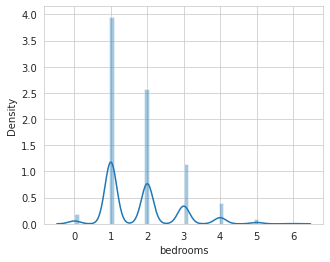

In [ ]:
#63
sb.distplot(bedrooms)

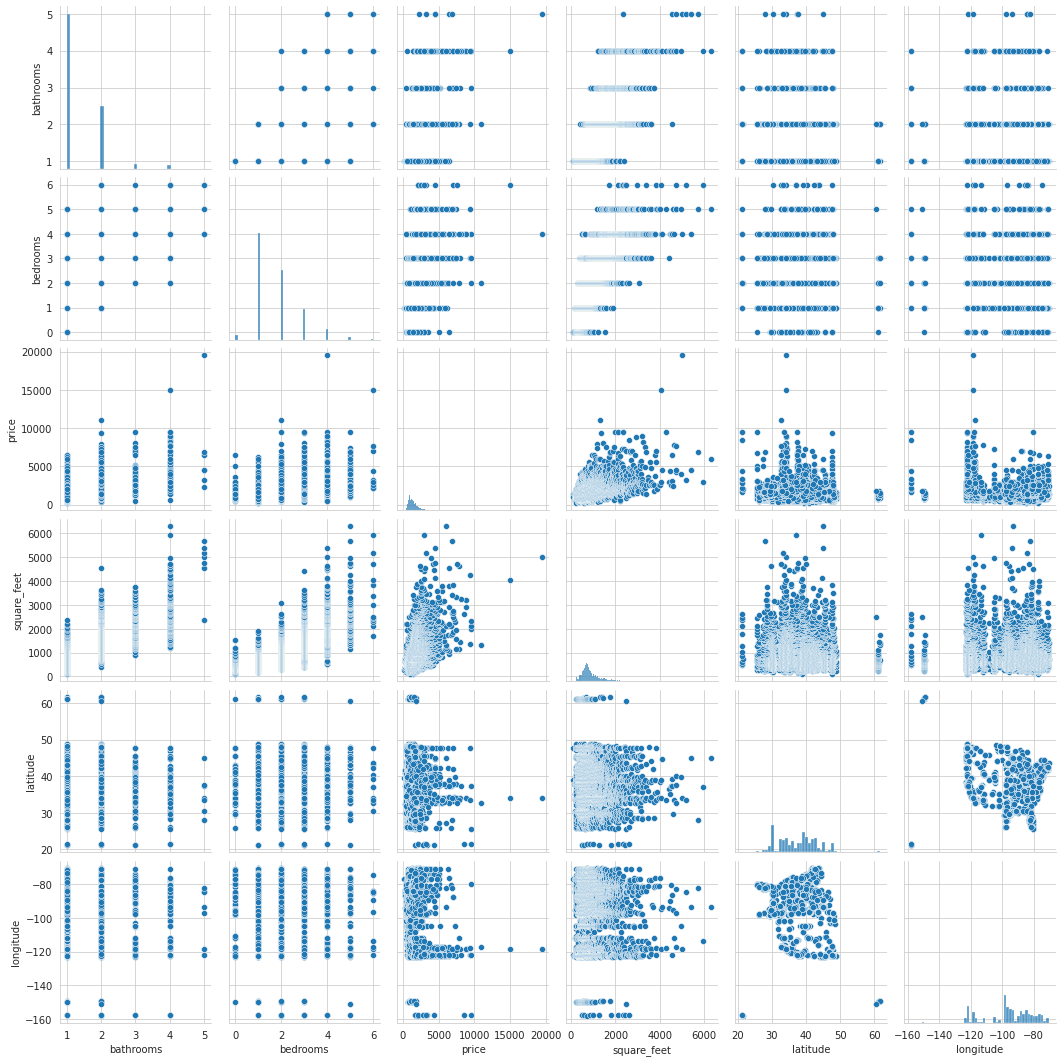

In [ ]:
#64
sb.pairplot(df)

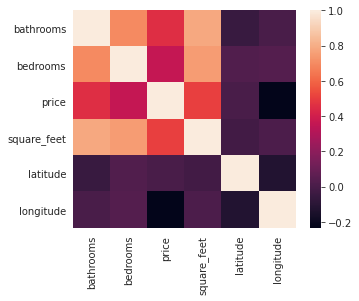

In [ ]:
#65
df.corr()
sb.heatmap(df.corr())

In [ ]:
#66
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8129 entries, 1390 to 6000
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   bathrooms     8129 non-null   float64       
 1   bedrooms      8129 non-null   float64       
 2   pets_allowed  8129 non-null   object        
 3   price         8129 non-null   int64         
 4   square_feet   8129 non-null   int64         
 5   cityname      8129 non-null   object        
 6   state         8129 non-null   object        
 7   latitude      8129 non-null   float64       
 8   longitude     8129 non-null   float64       
 9   source        8129 non-null   object        
 10  time          8129 non-null   datetime64[ns]
 11  Full_address  8129 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 825.6+ KB


Converting float to int type for bathrooms and bedrooms

In [ ]:
#67
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors = 'coerce')
df['bathrooms'] = df['bathrooms'].astype('int64')

df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors = 'coerce')
df['bedrooms'] = df['bedrooms'].astype('int64')
pd.options.display.float_format = '{:,.0f}'.format
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8129 entries, 1390 to 6000
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   bathrooms     8129 non-null   int64         
 1   bedrooms      8129 non-null   int64         
 2   pets_allowed  8129 non-null   object        
 3   price         8129 non-null   int64         
 4   square_feet   8129 non-null   int64         
 5   cityname      8129 non-null   object        
 6   state         8129 non-null   object        
 7   latitude      8129 non-null   float64       
 8   longitude     8129 non-null   float64       
 9   source        8129 non-null   object        
 10  time          8129 non-null   datetime64[ns]
 11  Full_address  8129 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 825.6+ KB


In [ ]:
#68
df.head()

,bathrooms,bedrooms,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,time,Full_address
price,,,,,,,,,,,,
1390,1,0,None,1390,107,Arlington,VA,39,-77,RentLingo,2019-12-26 11:23:30,"Studio apartment N Scott St, 14th St N, Arling..."
925,1,0,None,925,116,Seattle,WA,48,-122,RentLingo,2019-12-18 11:15:43,Studio apartment 1717 12th AveSeattle
1495,1,0,None,1495,138,San Francisco,CA,38,-122,RentLingo,2019-12-26 11:05:13,Studio apartment 333 Hyde StSan Francisco
1695,1,0,None,1695,190,San Francisco,CA,38,-122,RentLingo,2019-12-22 11:45:21,Studio apartment 57 Taylor StreetSan Francisco
1560,1,1,"Cats,Dogs",1560,200,New Bern,NC,35,-77,ListedBuy,2019-12-17 21:27:56,Studio Cottage 214New Bern


# (ii) Scatter plot
Like heatmap, a scatter plot is also used to observe linear relations between two variables in a dataset. In a scatter plot, the dependent variable is marked on the x-axis and the independent variable is marked on the y-axis. In our case, the ‘SalePrice’ attribute is the dependent variable, and every other are the independent variables. It would be difficult to produce a plot for each variable, so we can define a function that takes only the dependent variable and returns a scatter plot for every independent variable present in a dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


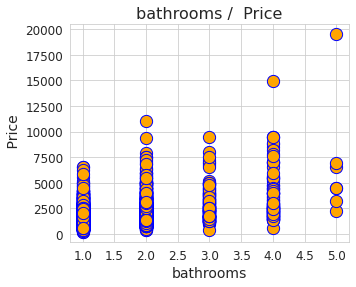

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


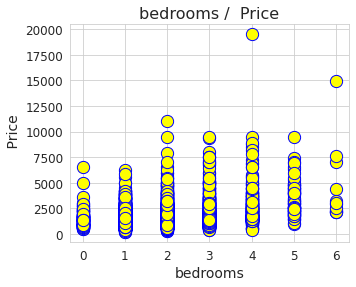

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


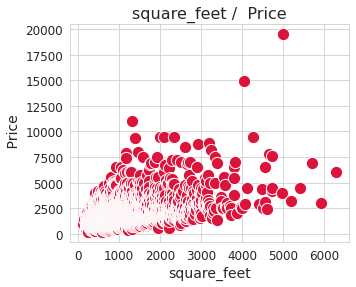

In [ ]:
# 69. Scatter plot

def scatter_df(y_var):
    scatter_df = df.drop(y_var, axis = 1)
    i = df.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} /  Price'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} /  Price'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
   
   
    
    plot5 = sb.scatterplot(i[4], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} /  Price'.format(i[4]), fontsize = 16)
    plt.xlabel('{}'.format(i[4]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    
    
scatter_df('price')

# **(iii) Distribution Plot**
Distribution plots are very useful to check how well a variable is distributed in the dataset. Let’s now produce a distribution plot using the ‘distplot’ function to check the distribution of the ‘SalePrice’ variable in the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


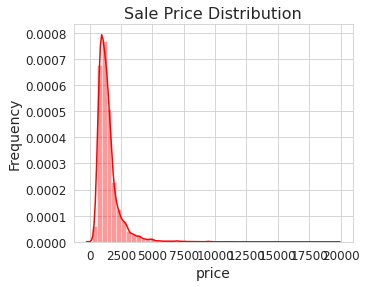

In [ ]:

# 70. Distribution plot

sb.distplot(df['price'], color = 'r')
plt.title('Sale Price Distribution', fontsize = 16)
plt.xlabel('price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.savefig('distplot.png')
plt.show()

In [ ]:
#80

number_df = df[['bathrooms', 'bedrooms', 'price', 'square_feet','time']]
number_df1 = df[['bathrooms', 'bedrooms', 'price', 'square_feet']]
string_df = df[['pets_allowed', 'cityname', 'state', 'source']]
number_df.head()

,bathrooms,bedrooms,price,square_feet,time
price,,,,,
1390,1,0,1390,107,2019-12-26 11:23:30
925,1,0,925,116,2019-12-18 11:15:43
1495,1,0,1495,138,2019-12-26 11:05:13
1695,1,0,1695,190,2019-12-22 11:45:21
1560,1,1,1560,200,2019-12-17 21:27:56


In [ ]:
#81
string_df.describe()

,pets_allowed,cityname,state,source
count,8129,8129,8129,8129
unique,4,1436,51,10
top,"Cats,Dogs",Austin,TX,RentLingo
freq,5169,522,1555,6793


the interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [ ]:

#56(corrcet numbering)
Q1 = number_df1.quantile(0.25)
Q3 = number_df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

bathrooms       1
bedrooms        1
price         750
square_feet   475
dtype: float64


In [ ]:
#67
number_df1['bathrooms'] = pd.to_numeric(number_df1['bathrooms'], errors = 'coerce')
number_df1['bathrooms'] = number_df1['bathrooms'].astype('int64')

number_df1['bedrooms'] = pd.to_numeric(number_df1['bedrooms'], errors = 'coerce')
number_df1['bedrooms'] = number_df1['bedrooms'].astype('int64')
pd.options.display.float_format = '{:,.0f}'.format
number_df1.head()
number_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8129 entries, 1390 to 6000
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   bathrooms    8129 non-null   int64
 1   bedrooms     8129 non-null   int64
 2   price        8129 non-null   int64
 3   square_feet  8129 non-null   int64
dtypes: int64(4)
memory usage: 317.5 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#62
#number_df.columns = ['bathrooms'	,'bedrooms','price','square_feet','time']
number_df1.index = number_df1.price
bedrooms = number_df1['bedrooms']

In [ ]:
#57
print(number_df1 < (Q1 - 1.5 * IQR)) |(number_df1 > (Q3 + 1.5 * IQR))


       bathrooms  bedrooms  price  square_feet
price                                         
1390       False     False  False        False
925        False     False  False        False
1495       False     False  False        False
1695       False     False  False        False
1560       False     False  False        False
...          ...       ...    ...          ...
3200       False     False  False        False
4500       False     False  False        False
6900       False     False  False        False
3000       False     False  False        False
6000       False     False  False        False

[8129 rows x 4 columns]


TypeError: ignored

In [ ]:
#58
number_df1.shape


(8129, 4)

In [ ]:

#59
number_df1 = number_df1[~((number_df1 < (Q1 - 1.5 * IQR)) |(number_df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
number_df1.shape
number_df1

,bathrooms,bedrooms,price,square_feet
price,,,,
1390,1,0,1390,107
925,1,0,925,116
1495,1,0,1495,138
1695,1,0,1695,190
1560,1,1,1560,200
...,...,...,...,...
1575,2,3,1575,1805
1549,2,3,1549,1806
1549,2,3,1549,1807


[]

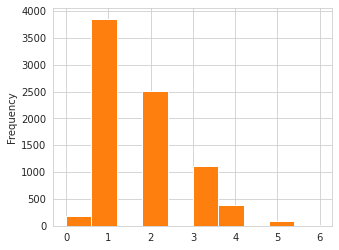

In [ ]:
#63
bedrooms.plot(kind='hist')
#17
plt.hist(bedrooms)
plt.plot()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


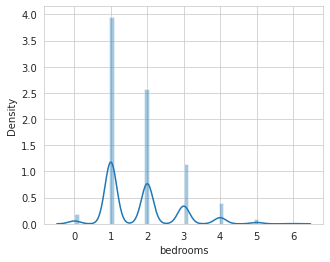

In [ ]:
#63
sb.distplot(bedrooms)

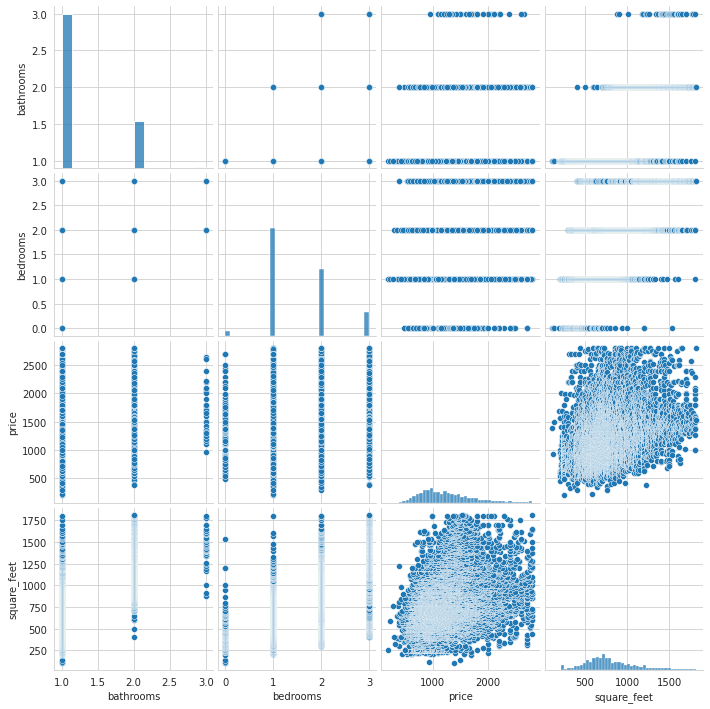

In [ ]:
#64
sb.pairplot(number_df1)

In [ ]:
number_df.corr()

,bathrooms,bedrooms,price,square_feet
bathrooms,1,1,0,1
bedrooms,1,1,0,1
price,0,0,1,1
square_feet,1,1,1,1


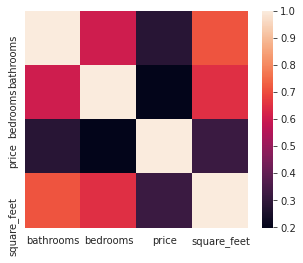

In [ ]:
#65
number_df.corr()
sb.heatmap(number_df1.corr())

scatter plot after removing the outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


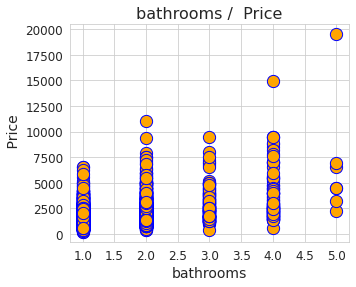

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


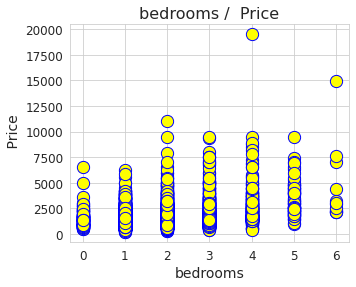

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


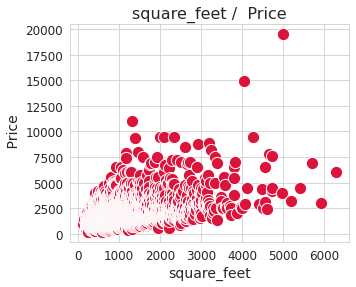

In [ ]:
# 69. Scatter plot

def scatter_df(y_var):
    scatter_df = number_df.drop(y_var, axis = 1)
    i = number_df1.columns
    
    plot1 = sb.scatterplot(i[0], y_var, data = df, color = 'orange', edgecolor = 'b', s = 150)
    plt.title('{} /  Price'.format(i[0]), fontsize = 16)
    plt.xlabel('{}'.format(i[0]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter1.png')
    plt.show()
    
    plot2 = sb.scatterplot(i[1], y_var, data = df, color = 'yellow', edgecolor = 'b', s = 150)
    plt.title('{} /  Price'.format(i[1]), fontsize = 16)
    plt.xlabel('{}'.format(i[1]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter2.png')
    plt.show()
    
   
   
    
    plot5 = sb.scatterplot(i[3], y_var, data = df, color = 'crimson', edgecolor = 'white', s = 150)
    plt.title('{} /  Price'.format(i[3]), fontsize = 16)
    plt.xlabel('{}'.format(i[3]), fontsize = 14)
    plt.ylabel(' Price', fontsize = 14)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig('scatter5.png')
    plt.show()
    
    
    
scatter_df('price')

# **EDA**

In [ ]:
#27
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

#28
street_map=gpd.read_file("/content/USA_States.shp")
fig,ax=plt.subplots(figsize=(10,10))
street_map.plot(ax=ax)
#29-1(KHALID)
'''geometry= [Point(xy) for xy in zip(df1["longitude"],df1["latitude"])]
geometry[:3]

#geometry.isnull().sum()
'''

#30
geometry= [Point(xy) for xy in zip(df["longitude"],df["latitude"])]
geometry[:3]
crs={"init":"epsg:4326"}
geo_df=gpd.GeoDataFrame(df,crs=crs,geometry=geometry)
geo_df.head()

#31
ax = geo_df['geometry'].plot(markersize=8, figsize=(10,10))
street_map.plot(ax=ax,alpha=0.4,color="grey")


DriverError: ignored

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor

**Measure of central tendency**

In [ ]:

#82
string_df.mode()


,pets_allowed,cityname,state,source
0,"Cats,Dogs",Austin,TX,RentLingo


In [ ]:
#83
# Mean: average value
number_df.mean()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


bathrooms         1
bedrooms          2
price         1,461
square_feet     938
dtype: float64

In [ ]:
# to_calculate.head()
#84
# Median: value in the middle of a sorted array
number_df.median()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  after removing the cwd from sys.path.


bathrooms         1
bedrooms          2
price         1,250
square_feet     788
dtype: float64

In [ ]:
#85

# Mode: most frequent value in column
number_df.mode()


,bathrooms,bedrooms,price,square_feet,time
0,1,1,"1,350",700,2019-12-22 12:14:26
1,nan,nan,nan,nan,2019-12-26 11:20:51
2,nan,nan,nan,nan,2019-12-26 11:24:49


In [ ]:
#86
# Standard deviation (SD) = variance^0.5
number_df.std()

bathrooms       1
bedrooms        1
price         909
square_feet   537
dtype: float64

Using facebook proophet to check trend

In [ ]:
#71
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from pandas import datetime

import fbprophet
from fbprophet import Prophet

from fbprophet.plot import add_changepoints_to_plot
from pandas import read_csv

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

In [ ]:
#72
df_fb=number_df[["time","price"]]
df_fb.reset_index(drop=True, inplace=True)
df_fb

,time,price
0,2019-12-26 11:23:30,1390
1,2019-12-18 11:15:43,925
2,2019-12-26 11:05:13,1495
3,2019-12-22 11:45:21,1695
4,2019-12-17 21:27:56,1560
...,...,...
8124,2019-12-26 11:41:29,3200
8125,2019-12-18 11:14:52,4500
8126,2019-12-26 11:24:02,6900
8127,2019-12-22 12:18:23,3000


remove time from time column

In [ ]:
#73
df_fb['time'] = pd.to_datetime(df_fb['time']).dt.date
df_fb

,time,price
0,2019-12-26,1390
1,2019-12-18,925
2,2019-12-26,1495
3,2019-12-22,1695
4,2019-12-17,1560
...,...,...
8124,2019-12-26,3200
8125,2019-12-18,4500
8126,2019-12-26,6900
8127,2019-12-22,3000


In [ ]:
#74
df_fb.rename(columns={'time': 'ds', 'price': 'y'}, inplace=True)

In [ ]:
#75
m = Prophet()
m.fit(df_fb)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#76
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
389,2020-12-21
390,2020-12-22
391,2020-12-23
392,2020-12-24
393,2020-12-25


In [ ]:
#77 Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
389,2020-12-21,"2,593","1,472","3,753"
390,2020-12-22,"2,790","1,679","3,898"
391,2020-12-23,"2,747","1,675","3,926"
392,2020-12-24,"2,439","1,283","3,545"
393,2020-12-25,"2,721","1,529","3,988"


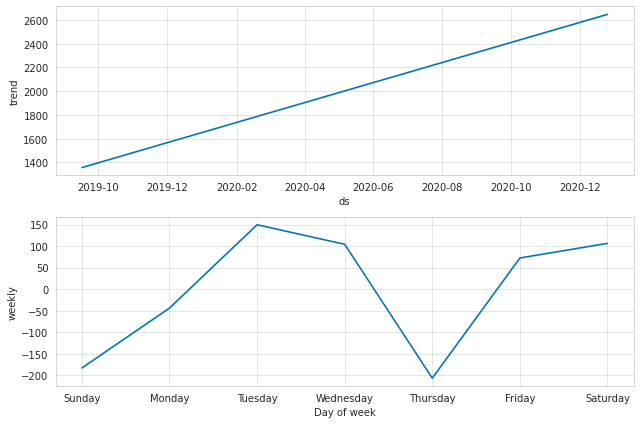

In [ ]:
#78
fig2 = m.plot_components(forecast)

# ITERATION 2 OF PROHPHETPROPHET 

In [ ]:
'''#79
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import math
from matplotlib.ticker import MaxNLocator
from fbprophet import Prophet
import squarify'''

"#79\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\nimport matplotlib.pyplot as plt\nplt.style.use('fivethirtyeight')\nimport seaborn as sns\nimport math\nfrom matplotlib.ticker import MaxNLocator\nfrom fbprophet import Prophet\nimport squarify"

spiltting dataset into train and test